# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take a pandas series and a degree and return a numpy array where each column is the array to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the array column 2 is the array squared and column 3 is the array cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

# Import used libs

In [1]:
import pandas as pd
import numpy as np

Next we're going to write a polynomial function that takes an array and a maximal degree and returns an array with columns containing the array to all the powers up to the maximal degree.

The easiest way to apply a power to an array is to use the .apply() and lambda x: functions. 
For example to take the example array and compute the third power we can do as follows:

In [2]:
tmp = pd.Series([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print tmp
print tmp_cubed

0    1
1    2
2    3
dtype: float64
0     1
1     8
2    27
dtype: float64


We can create an empty numpy array using numpy.array() and then add any columns to it with ex_frame['column_name'] = value. For example we create an empty numpy array and make the column 'power_1' to be the first power of tmp (i.e. tmp itself).

In [3]:
ex_frame = pd.DataFrame()
ex_frame['power_1'] = tmp
print ex_frame

   power_1
0        1
1        2
2        3


# Polynomial_sframe function

Using the hints above complete the following function to create a dataframe consisting of the powers of a series up to a specific degree:

In [4]:
def polynomial_frame(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_frame = pd.DataFrame()
    # and set poly_frame['power_1'] equal to the passed feature
    poly_frame['power_1'] = feature

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_frame[name] = feature.apply(lambda x: x**power)

    return poly_frame

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [5]:
print polynomial_frame(tmp, 3)

   power_1  power_2  power_3
0        1        1        1
1        2        4        8
2        3        9       27


# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [6]:
sales = pd.read_csv('data/kc_house_data.csv', dtype={'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

For the rest of the notebook we'll use the sqft_living variable. For plotting purposes (connected the dots) you'll need to sort by the values of sqft_living first:

In [7]:
input_features = 'sqft_living'
sales = sales.sort_values(by=input_features)

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [8]:
target = 'price'
poly1_data = polynomial_frame(sales[input_features], 1)
target_data = sales[target]

*NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users.*

In [9]:
from sklearn import linear_model

In [10]:
model1 = linear_model.LinearRegression()
model1.fit(poly1_data, target_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print 'Intercept: {}'.format(model1.intercept_)
print 'Coefficients: {}'.format(model1.coef_)

Intercept: -43580.7430945
Coefficients: [ 280.6235679]


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

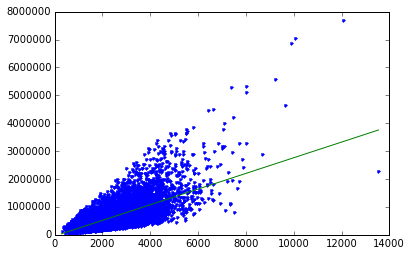

In [13]:
plt.plot(poly1_data, target_data, '.',
         poly1_data, model1.predict(poly1_data), '-')

Let's unpack that plt.plot() command. The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [14]:
def fit_regression(poly_data, target_data, print_plot=False):
    model = linear_model.LinearRegression()
    model.fit(poly_data, target_data)
    if print_plot:
        print 'Intercept: {}'.format(model.intercept_)
        print 'Coefficients: {}'.format(model.coef_)
        plt.plot(poly_data['power_1'], target_data, '.',
                 poly_data['power_1'], model.predict(poly_data), '-')
    return model

In [15]:
def poly_fit_regression(data_set, power, input_features, target, print_plot=False):
    poly_data = polynomial_frame(data_set[input_features], power)
    model = fit_regression(poly_data, data_set[target], print_plot)
    return (model, poly_data.columns)

Intercept: 199222.279305
Coefficients: [  6.79940947e+01   3.85812609e-02]


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 Index([u'power_1', u'power_2'], dtype='object'))

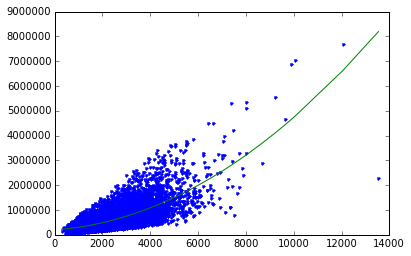

In [16]:
poly_fit_regression(sales, 2, input_features, target, True)

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

Intercept: 336819.748223
Coefficients: [ -9.01819864e+01   8.70465089e-02  -3.84055260e-06]


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 Index([u'power_1', u'power_2', u'power_3'], dtype='object'))

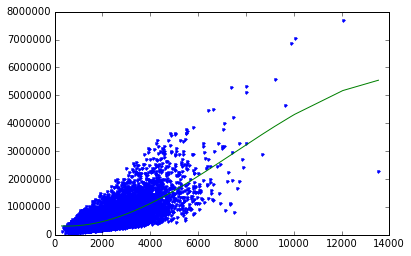

In [17]:
poly_fit_regression(sales, 3, input_features, target, True)

Now try a 15th degree polynomial:

Intercept: 537116.329638
Coefficients: [  4.56404164e-91  -6.23779018e-50   1.13588249e-55   5.50811861e-60
   3.16753185e-75   2.68575535e-71   2.26147568e-67   1.85900299e-63
   1.47144115e-59   1.09771012e-55   7.43509038e-52   4.23015577e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53]


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 Index([u'power_1', u'power_2', u'power_3', u'power_4', u'power_5', u'power_6',
        u'power_7', u'power_8', u'power_9', u'power_10', u'power_11',
        u'power_12', u'power_13', u'power_14', u'power_15'],
       dtype='object'))

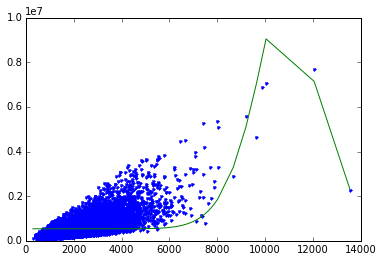

In [18]:
poly_fit_regression(sales, 15, input_features, target, True)

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Do this as follows:
* First split sales into 2 subsets using .random_split(0.5) set seed = 0! 
* Next split the resulting subsets into 2 more subsets each. Use .random_split(.5) and seed = 0!
You should end with 4 subsets (set_1, set_2, set_3, set_4) of approximately equal size. 

In [19]:
set_1 = pd.read_csv('data/wk3_kc_house_set_1_data.csv', dtype={'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set_2 = pd.read_csv('data/wk3_kc_house_set_2_data.csv', dtype={'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set_3 = pd.read_csv('data/wk3_kc_house_set_3_data.csv', dtype={'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set_4 = pd.read_csv('data/wk3_kc_house_set_4_data.csv', dtype={'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

Next you will 
* learn a 15th degree polynomial model on all four subsets of the data. 
* print the coefficients (you should use .print_rows(num_rows = 16) to view all of them)
* plot the resulting fit (as we did above).

Intercept: 503785.747504
Coefficients: [  6.89682167e-77  -1.75431609e-39  -4.10372461e-45   3.80431717e-51
   3.35438082e-54   4.15727383e-58   7.38787846e-55   2.90488586e-51
   1.05771932e-47   3.41107416e-44   8.90061175e-41   1.46682467e-37
  -5.97011358e-41   8.09308468e-45  -3.65206853e-49]


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 Index([u'power_1', u'power_2', u'power_3', u'power_4', u'power_5', u'power_6',
        u'power_7', u'power_8', u'power_9', u'power_10', u'power_11',
        u'power_12', u'power_13', u'power_14', u'power_15'],
       dtype='object'))

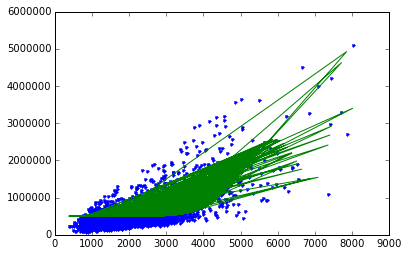

In [20]:
poly_fit_regression(set_1, 15, input_features, target, True)

Intercept: 528840.459685
Coefficients: [  3.77768351e-89  -2.32137511e-49   1.60636683e-55  -1.89452105e-59
   5.94206648e-73   8.23654535e-70   5.58800927e-66   3.70078615e-62
   2.36186154e-58   1.42277710e-54   7.79727693e-51   3.59813838e-47
   1.11812668e-43  -2.09221413e-47   9.66668330e-52]


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 Index([u'power_1', u'power_2', u'power_3', u'power_4', u'power_5', u'power_6',
        u'power_7', u'power_8', u'power_9', u'power_10', u'power_11',
        u'power_12', u'power_13', u'power_14', u'power_15'],
       dtype='object'))

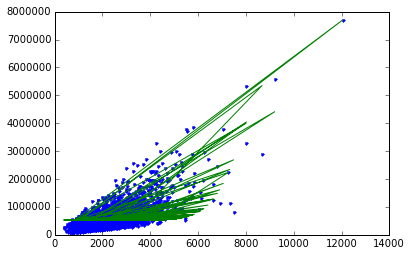

In [21]:
poly_fit_regression(set_2, 15, input_features, target, True)

Intercept: 518218.752372
Coefficients: [  1.77513210e-78  -1.55300586e-39   7.04448019e-45  -7.37715943e-50
   3.72144719e-54   4.83080764e-57   5.05077140e-56   2.37776832e-52
   1.03874636e-48   4.02619072e-45   1.26464703e-41   2.51250170e-38
  -8.31407564e-42   9.12474806e-46  -3.32272050e-50]


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 Index([u'power_1', u'power_2', u'power_3', u'power_4', u'power_5', u'power_6',
        u'power_7', u'power_8', u'power_9', u'power_10', u'power_11',
        u'power_12', u'power_13', u'power_14', u'power_15'],
       dtype='object'))

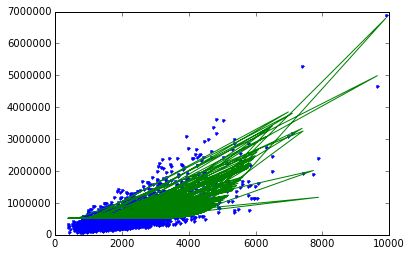

In [22]:
poly_fit_regression(set_3, 15, input_features, target, True)

Intercept: 533485.968219
Coefficients: [  4.35841713e-89  -5.01407376e-49  -3.18932749e-54  -1.91650594e-59
   3.05563229e-73   8.32740036e-70   5.54648172e-66   3.62756703e-62
   2.30173413e-58   1.38870224e-54   7.68212262e-51   3.60753698e-47
   1.15031317e-43  -1.97171293e-47   8.28782429e-52]


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 Index([u'power_1', u'power_2', u'power_3', u'power_4', u'power_5', u'power_6',
        u'power_7', u'power_8', u'power_9', u'power_10', u'power_11',
        u'power_12', u'power_13', u'power_14', u'power_15'],
       dtype='object'))

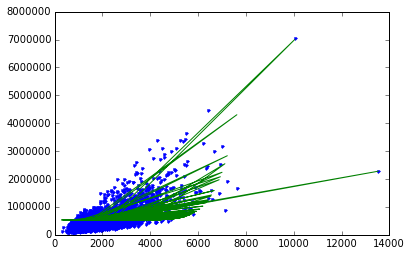

In [23]:
poly_fit_regression(set_4, 15, input_features, target, True)

Some questions you will be asked on your quiz:

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**

**Quiz Question: True/False the plotted fitted lines look the same in all four plots**

# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one very well-known way to select these parameters: cross validation. 

Now you're going to split the sales data again this time into 3 subsets as follows:

* Split our sales data into 2 sets: training_and_validation and testing. Use .random_split(0.9) and seed = 1!
* Next split training_and_validation into trainign and validation with .random_split(0.5) and seed = 1!

Be *very* careful that you use seed = 1 to ensure you get the same answer!

In [24]:
train_data = pd.read_csv('data/wk3_kc_house_train_data.csv', dtype={'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
valid_data = pd.read_csv('data/wk3_kc_house_valid_data.csv', dtype={'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
test_data = pd.read_csv('data/wk3_kc_house_test_data.csv', dtype={'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an array of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial array
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynomial array using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

In [30]:
RSS = np.empty(15, dtype=object)
for degree in range(1,16):
    poly_data = polynomial_frame(train_data[input_features], degree)
    model = fit_regression(poly_data, train_data[target])
    poly_valid_data = polynomial_frame(valid_data[input_features], degree)
    RSS[degree-1] = np.sum(((model.predict(poly_valid_data) - valid_data[target]) ** 2))

In [31]:
min_degree = np.argmin(RSS) + 1
print 'Min validation error degree: {} ({})'.format(min_degree, RSS[min_degree-1])

Min validation error degree: 6 (5.66268801658e+14)


**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data. Report the RSS on your quiz.

In [32]:
poly_min_data = polynomial_frame(train_data[input_features], min_degree)
model_min = fit_regression(poly_min_data, train_data[target])
poly_test_min_data = polynomial_frame(test_data[input_features], min_degree)
RSS_min = np.sum(((model_min.predict(poly_test_min_data) - test_data[target]) ** 2))
print 'RSS on TEST data: {}'.format(RSS_min)

RSS on TEST data: 1.35225124064e+14


**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)**